228813984/228813984 [==============================] - 1s 0us/step
/root/.keras/datasets/flower_photos
/root/.keras/datasets/flower_photos/roses/15255964454_0a64eb67fa.jpg
Found 3670 files belonging to 5 classes.
Using 2936 files for training.
Found 3670 files belonging to 5 classes.
Using 734 files for validation.
['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


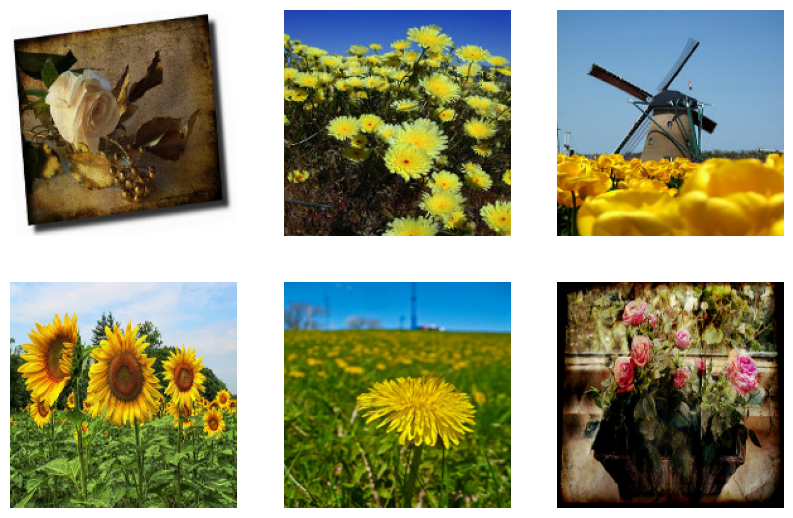

94765736/94765736 [==============================] - 1s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 512)               1049088   
                                                                 
 dense_1 (Dense)             (None, 5)                 2565      
                                                                 
Total params: 24,639,365
Trainable params: 1,051,653
Non-trainable params: 23,587,712
_________________________________________________________________


Epoch 1/2
92/92 [==============================] - 343s 4s/step - loss: 0.6727 - accuracy: 0.7854 - val_loss: 0.3799 - val_accuracy: 0.8597


In [ ]:
# -*- coding: utf-8 -*-
"""ResNet50.ipynb

Automatically generated by Colaboratory.

Original file is located at
    https://colab.research.google.com/drive/11zpO0I0FE-erLYZ8NwpiRKdY90Tmh6jE

```
# resnet50 Library
```
"""

import matplotlib.pyplot as plotter_lib
import numpy as np
import PIL as image_lib
import tensorflow as tflow
from tensorflow.keras.layers import Flatten
from keras.layers.core import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

import pathlib
demo_dataset = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
directory = tflow.keras.utils.get_file('flower_photos', origin=demo_dataset, untar=True)
data_directory = pathlib.Path(directory)

print(data_directory)

roses = list(data_directory.glob('roses/*'))
print(roses[0])
image_lib.Image.open(str(roses[0]))

img_height,img_width=180,180
batch_size=32
train_ds = tflow.keras.preprocessing.image_dataset_from_directory(
  data_directory,
  validation_split=0.2,
  subset="training",
  seed=123,
label_mode='categorical',
  image_size=(img_height, img_width),
  batch_size=batch_size)

validation_ds = tflow.keras.preprocessing.image_dataset_from_directory(
  data_directory,
  validation_split=0.2,
  subset="validation",
  seed=123,
label_mode='categorical',
  image_size=(img_height, img_width),
  batch_size=batch_size)

class_names = train_ds.class_names
print(class_names)

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
epochs=10
for images, labels in train_ds.take(1):
    for var in range(6):
        ax = plt.subplot(3, 3, var + 1)
        plt.imshow(images[var].numpy().astype("uint8"))
        plt.axis("off")
plt.show()

demo_resnet_model = Sequential()
pretrained_model_for_demo= tflow.keras.applications.ResNet50(include_top=False,
                   input_shape=(180,180,3),
                   pooling='avg',classes=5,
                   weights='imagenet')
for each_layer in pretrained_model_for_demo.layers:
        each_layer.trainable=False



demo_resnet_model.add(pretrained_model_for_demo)
demo_resnet_model.add(Flatten())
demo_resnet_model.add(Dense(512, activation='relu'))
demo_resnet_model.add(Dense(5, activation='softmax'))

demo_resnet_model.summary()

demo_resnet_model.compile(optimizer=Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

epochs=2

history = demo_resnet_model.fit(train_ds, validation_data=validation_ds, epochs=epochs)

plotter_lib.figure(figsize=(8, 8))
epochs_range= range(epochs)
plotter_lib.plot( epochs_range, history.history['accuracy'], label="Training Accuracy")
plotter_lib.plot(epochs_range, history.history['val_accuracy'], label="Validation Accuracy")
plotter_lib.axis(ymin=0.4,ymax=1)
plotter_lib.grid()
plotter_lib.title('Model Accuracy')
plotter_lib.ylabel('Accuracy')
plotter_lib.xlabel('Epochs')
plotter_lib.legend(['train', 'validation'])

import cv2
sample_image=cv2.imread(str(roses[0]))
sample_image_resized= cv2.resize(sample_image, (img_height,img_width))
sample_image=np.expand_dims(sample_image_resized,axis=0)

image_output_class=class_names[np.argmax(image_lib)]
print("The predicted class is", image_output_class)